IMPORTING LIBRARIES AND READING DATA

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

import warnings
warnings.filterwarnings('ignore')

In [77]:
dataset = pd.read_csv('file.csv')
dataset

,Unnamed: 0,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,...,Avg_Price,Delivery_Charges,Coupon_Status,GST,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct
0,0,17850.0,M,Chicago,12.0,16679.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
1,1,17850.0,M,Chicago,12.0,16680.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
2,2,17850.0,M,Chicago,12.0,16696.0,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,...,122.77,6.5,Not Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
3,3,17850.0,M,Chicago,12.0,16699.0,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,...,81.50,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
4,4,17850.0,M,Chicago,12.0,16700.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52950,52950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gift Cards,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,GC20,20.0
52951,52951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Notebooks & Journals,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,NJ20,20.0
52952,52952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Android,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,AND10,10.0
52953,52953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Android,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,AND20,20.0


EDA

In [78]:
# prompt: print a table with the datatype and null count and null percentage of each columns
info = pd.DataFrame(dataset.dtypes, columns=['DataType'])
info['Null Count'] = dataset.isnull().sum()
info['Null Percentage'] = 100 * info['Null Count'] / len(dataset)

print(info.to_string())


                    DataType  Null Count  Null Percentage
Unnamed: 0             int64           0         0.000000
CustomerID           float64          31         0.058540
Gender                object          31         0.058540
Location              object          31         0.058540
Tenure_Months        float64          31         0.058540
Transaction_ID       float64          31         0.058540
Transaction_Date      object          31         0.058540
Product_SKU           object          31         0.058540
Product_Description   object          31         0.058540
Product_Category      object           0         0.000000
Quantity             float64          31         0.058540
Avg_Price            float64          31         0.058540
Delivery_Charges     float64          31         0.058540
Coupon_Status         object          31         0.058540
GST                  float64          31         0.058540
Date                  object          31         0.058540
Offline_Spend 

As we have very few missing values, we can drop those data

In [79]:
dataset = dataset.dropna(subset=['CustomerID'])

In [80]:
dataset.drop_duplicates(inplace=True)
dataset.shape

(52924, 21)

In [81]:
info = pd.DataFrame(dataset.dtypes, columns=['DataType'])
info['Null Count'] = dataset.isnull().sum()
info['Null Percentage'] = 100 * info['Null Count'] / len(dataset)

print(info.to_string())

                    DataType  Null Count  Null Percentage
Unnamed: 0             int64           0         0.000000
CustomerID           float64           0         0.000000
Gender                object           0         0.000000
Location              object           0         0.000000
Tenure_Months        float64           0         0.000000
Transaction_ID       float64           0         0.000000
Transaction_Date      object           0         0.000000
Product_SKU           object           0         0.000000
Product_Description   object           0         0.000000
Product_Category      object           0         0.000000
Quantity             float64           0         0.000000
Avg_Price            float64           0         0.000000
Delivery_Charges     float64           0         0.000000
Coupon_Status         object           0         0.000000
GST                  float64           0         0.000000
Date                  object           0         0.000000
Offline_Spend 

Checking if Customers having missing Coupon_Code has missing Discount_pct

In [82]:
customer_coupon_discount = dataset[dataset['CustomerID'].notnull() & dataset['Coupon_Code'].isnull()][['CustomerID', 'Discount_pct']]
customer_coupon_discount

,CustomerID,Discount_pct
3895,17850.0,NaN
3896,17850.0,NaN
3897,14060.0,NaN
3898,15061.0,NaN
3899,18074.0,NaN
...,...,...
52909,14159.0,NaN
52910,14577.0,NaN
52911,14667.0,NaN
52912,16442.0,NaN


In [83]:
null_count = customer_coupon_discount['Discount_pct'].isnull().sum()
print(f"Number of null values in Discount_pct: {null_count}")

Number of null values in Discount_pct: 400


We see that for all customers with no coupon_code, there is no discount_pct

In [84]:
dataset.drop(columns=['Unnamed: 0', 'Product_SKU'],inplace=True)

In [85]:
dataset

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,GST,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct
0,17850.0,M,Chicago,12.0,16679.0,2019-01-01,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Used,0.10,1/1/2019,4500.0,2424.50,1,ELEC10,10.0
1,17850.0,M,Chicago,12.0,16680.0,2019-01-01,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Used,0.10,1/1/2019,4500.0,2424.50,1,ELEC10,10.0
2,17850.0,M,Chicago,12.0,16696.0,2019-01-01,Nest Cam Outdoor Security Camera - USA,Nest-USA,2.0,122.77,6.5,Not Used,0.10,1/1/2019,4500.0,2424.50,1,ELEC10,10.0
3,17850.0,M,Chicago,12.0,16699.0,2019-01-01,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1.0,81.50,6.5,Clicked,0.10,1/1/2019,4500.0,2424.50,1,ELEC10,10.0
4,17850.0,M,Chicago,12.0,16700.0,2019-01-01,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Clicked,0.10,1/1/2019,4500.0,2424.50,1,ELEC10,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,13155.0,F,California,8.0,22504.0,2019-03-10,Gift Card - $250.00,Gift Cards,1.0,250.00,0.0,Clicked,0.05,3/10/2019,2500.0,1294.22,3,GC30,30.0
52920,18077.0,M,Chicago,34.0,24250.0,2019-03-28,Gift Card - $25.00,Gift Cards,1.0,25.00,0.0,Used,0.05,3/28/2019,2000.0,1066.12,3,GC30,30.0
52921,16085.0,M,California,15.0,39991.0,2019-10-06,Google Leather Perforated Journal,Notebooks & Journals,1.0,10.80,6.0,Clicked,0.05,10/6/2019,3000.0,2230.76,10,NJ10,10.0
52922,16085.0,M,California,15.0,39991.0,2019-10-06,Google Spiral Leather Journal,Notebooks & Journals,1.0,9.60,6.0,Used,0.05,10/6/2019,3000.0,2230.76,10,NJ10,10.0


In [86]:
date_columns = ['Transaction_Date', 'Date']

for column in date_columns:
  dataset[column] = pd.to_datetime(dataset[column])

for column in date_columns:
  if dataset[column].equals(dataset['Transaction_Date']):
    print(f"{column} is the same as Transaction_Date")
  else:
    print(f"{column} is different from Transaction_Date")

Transaction_Date is the same as Transaction_Date
Date is the same as Transaction_Date


We can see that Date and Transaction Date are same, so removing Date

In [87]:
dataset.drop(columns=['Date'],inplace=True)
dataset

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,GST,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct
0,17850.0,M,Chicago,12.0,16679.0,2019-01-01,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Used,0.10,4500.0,2424.50,1,ELEC10,10.0
1,17850.0,M,Chicago,12.0,16680.0,2019-01-01,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Used,0.10,4500.0,2424.50,1,ELEC10,10.0
2,17850.0,M,Chicago,12.0,16696.0,2019-01-01,Nest Cam Outdoor Security Camera - USA,Nest-USA,2.0,122.77,6.5,Not Used,0.10,4500.0,2424.50,1,ELEC10,10.0
3,17850.0,M,Chicago,12.0,16699.0,2019-01-01,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1.0,81.50,6.5,Clicked,0.10,4500.0,2424.50,1,ELEC10,10.0
4,17850.0,M,Chicago,12.0,16700.0,2019-01-01,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Clicked,0.10,4500.0,2424.50,1,ELEC10,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,13155.0,F,California,8.0,22504.0,2019-03-10,Gift Card - $250.00,Gift Cards,1.0,250.00,0.0,Clicked,0.05,2500.0,1294.22,3,GC30,30.0
52920,18077.0,M,Chicago,34.0,24250.0,2019-03-28,Gift Card - $25.00,Gift Cards,1.0,25.00,0.0,Used,0.05,2000.0,1066.12,3,GC30,30.0
52921,16085.0,M,California,15.0,39991.0,2019-10-06,Google Leather Perforated Journal,Notebooks & Journals,1.0,10.80,6.0,Clicked,0.05,3000.0,2230.76,10,NJ10,10.0
52922,16085.0,M,California,15.0,39991.0,2019-10-06,Google Spiral Leather Journal,Notebooks & Journals,1.0,9.60,6.0,Used,0.05,3000.0,2230.76,10,NJ10,10.0


In [88]:
unique_value_counts = dataset.nunique()
print(unique_value_counts)

CustomerID              1468
Gender                     2
Location                   5
Tenure_Months             49
Transaction_ID         25061
Transaction_Date         365
Product_Description      404
Product_Category          20
Quantity                 151
Avg_Price                546
Delivery_Charges         267
Coupon_Status              3
GST                        4
Offline_Spend             11
Online_Spend             365
Month                     12
Coupon_Code               45
Discount_pct               3
dtype: int64


DATA VISUALIZATION

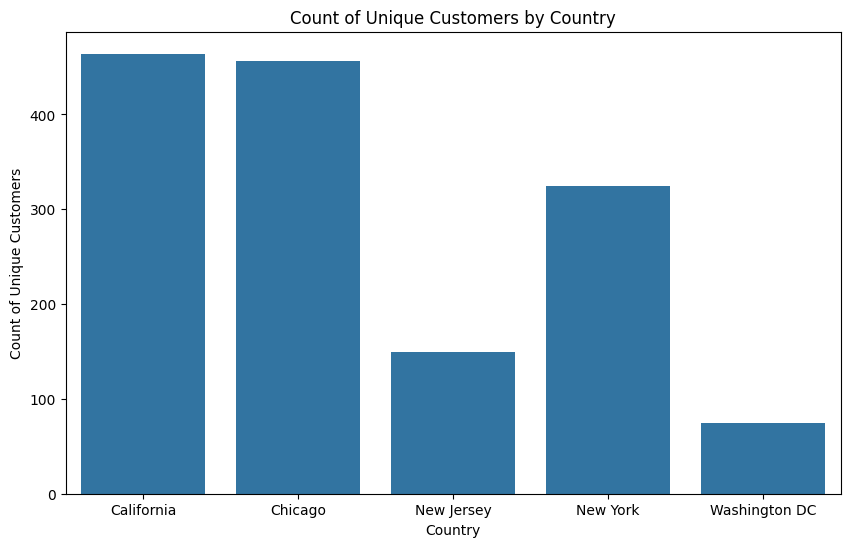

In [89]:
# Get the count of unique Customer_ID for each country
country_customer_count = dataset.groupby('Location')['CustomerID'].nunique()

# Plot the count of unique Customer_ID for each country
plt.figure(figsize=(10, 6))
sns.barplot(x=country_customer_count.index, y=country_customer_count.values)
plt.xlabel('Country')
plt.ylabel('Count of Unique Customers')
plt.title('Count of Unique Customers by Country')
plt.show()


<li>We can see that there are high number of customers from California and Chicago.</li>
<li>Washington DC has the least customers.</li>

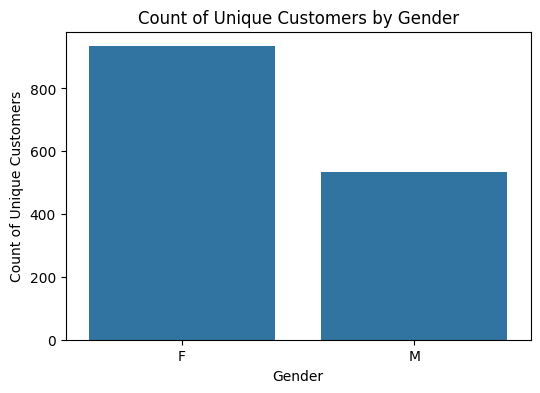

In [90]:
# Get the count of unique Customer_ID for each gender
gender_customer_count = dataset.groupby('Gender')['CustomerID'].nunique()

# Plot the count of unique Customer_ID for each gender
plt.figure(figsize=(6, 4))
sns.barplot(x=gender_customer_count.index, y=gender_customer_count.values)
plt.xlabel('Gender')
plt.ylabel('Count of Unique Customers')
plt.title('Count of Unique Customers by Gender')
plt.show()


There are more number of female customers.

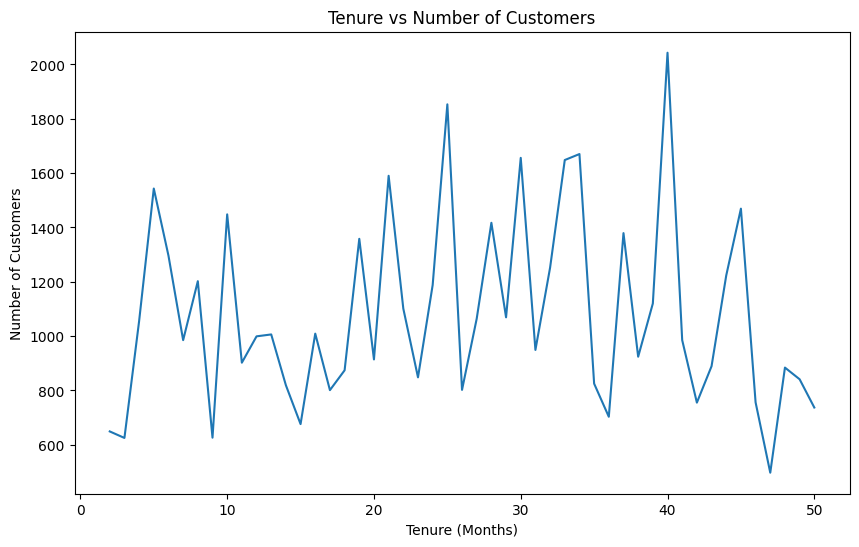

In [91]:
# Get the count of customers for each tenure month
tenure_counts = dataset.groupby('Tenure_Months')['CustomerID'].count()

plt.figure(figsize=(10, 6))
sns.lineplot(x=tenure_counts.index, y=tenure_counts.values)
plt.xlabel('Tenure (Months)')
plt.ylabel('Number of Customers')
plt.title('Tenure vs Number of Customers')
plt.show()


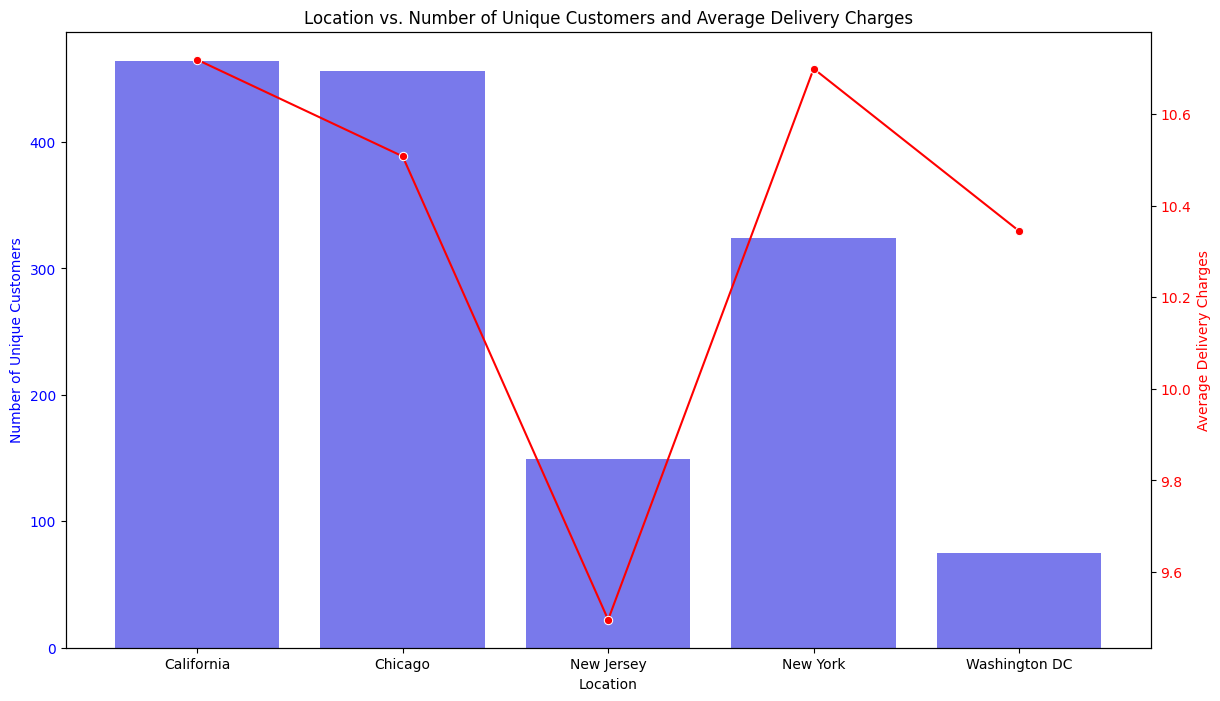

In [92]:
# Calculate the number of unique customers and average delivery charges per location
unique_customer_delivery_charges = (
    dataset.groupby('Location')
    .agg(
        unique_customers=pd.NamedAgg(column='CustomerID', aggfunc='nunique'),
        avg_delivery_charges=pd.NamedAgg(column='Delivery_Charges', aggfunc='mean')
    )
    .reset_index()
)

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 8))

# Bar plot for the number of unique customers
sns.barplot(x='Location', y='unique_customers', data=unique_customer_delivery_charges, ax=ax1, color='b', alpha=0.6)
ax1.set_xlabel('Location')
ax1.set_ylabel('Number of Unique Customers', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Line plot for the average delivery charges
ax2 = ax1.twinx()
sns.lineplot(x='Location', y='avg_delivery_charges', data=unique_customer_delivery_charges, ax=ax2, color='r', marker='o')
ax2.set_ylabel('Average Delivery Charges', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Adding title
plt.title('Location vs. Number of Unique Customers and Average Delivery Charges')

plt.show()


We can see that New York and California has highest delivery charges.

There is a number mentioned in the coupon code. Checking if it is same as Discount percentage.

In [93]:
# extract the number in the coupon_code and put it in a new column

dataset['Coupon_Number'] = dataset['Coupon_Code'].str.extract('(\d+)')
dataset

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,GST,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct,Coupon_Number
0,17850.0,M,Chicago,12.0,16679.0,2019-01-01,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Used,0.10,4500.0,2424.50,1,ELEC10,10.0,10
1,17850.0,M,Chicago,12.0,16680.0,2019-01-01,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Used,0.10,4500.0,2424.50,1,ELEC10,10.0,10
2,17850.0,M,Chicago,12.0,16696.0,2019-01-01,Nest Cam Outdoor Security Camera - USA,Nest-USA,2.0,122.77,6.5,Not Used,0.10,4500.0,2424.50,1,ELEC10,10.0,10
3,17850.0,M,Chicago,12.0,16699.0,2019-01-01,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1.0,81.50,6.5,Clicked,0.10,4500.0,2424.50,1,ELEC10,10.0,10
4,17850.0,M,Chicago,12.0,16700.0,2019-01-01,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Clicked,0.10,4500.0,2424.50,1,ELEC10,10.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,13155.0,F,California,8.0,22504.0,2019-03-10,Gift Card - $250.00,Gift Cards,1.0,250.00,0.0,Clicked,0.05,2500.0,1294.22,3,GC30,30.0,30
52920,18077.0,M,Chicago,34.0,24250.0,2019-03-28,Gift Card - $25.00,Gift Cards,1.0,25.00,0.0,Used,0.05,2000.0,1066.12,3,GC30,30.0,30
52921,16085.0,M,California,15.0,39991.0,2019-10-06,Google Leather Perforated Journal,Notebooks & Journals,1.0,10.80,6.0,Clicked,0.05,3000.0,2230.76,10,NJ10,10.0,10
52922,16085.0,M,California,15.0,39991.0,2019-10-06,Google Spiral Leather Journal,Notebooks & Journals,1.0,9.60,6.0,Used,0.05,3000.0,2230.76,10,NJ10,10.0,10


In [94]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52924 entries, 0 to 52923
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           52924 non-null  float64       
 1   Gender               52924 non-null  object        
 2   Location             52924 non-null  object        
 3   Tenure_Months        52924 non-null  float64       
 4   Transaction_ID       52924 non-null  float64       
 5   Transaction_Date     52924 non-null  datetime64[ns]
 6   Product_Description  52924 non-null  object        
 7   Product_Category     52924 non-null  object        
 8   Quantity             52924 non-null  float64       
 9   Avg_Price            52924 non-null  float64       
 10  Delivery_Charges     52924 non-null  float64       
 11  Coupon_Status        52924 non-null  object        
 12  GST                  52924 non-null  float64       
 13  Offline_Spend        52924 non-null 

Coupon_Number was datatyped as object, so converting it to float

In [95]:
dataset['Coupon_Number'] = dataset['Coupon_Number'].astype(float)

In [96]:
# check if coupon_number is same as discount_pct

is_same = dataset['Coupon_Number'].equals(dataset['Discount_pct'])
print(f"Coupon_Number and Discount_pct are the same: {is_same}")

Coupon_Number and Discount_pct are the same: True


So the number written in the coupon_code is the discount percentage

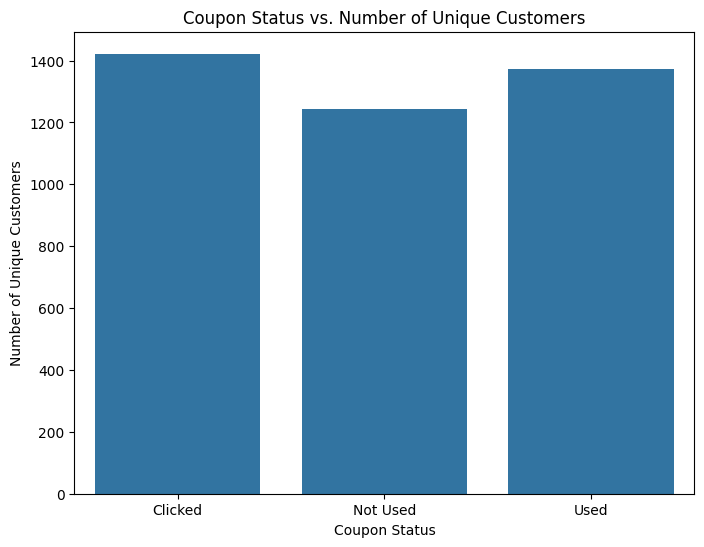

In [97]:
# Group the data by Coupon_Status and calculate the number of unique customers
coupon_status_unique_customers = (
    dataset.groupby('Coupon_Status')['CustomerID'].nunique()
    .reset_index()
    .rename(columns={'CustomerID': 'Unique_Customers'})
)

# Plot the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='Coupon_Status', y='Unique_Customers', data=coupon_status_unique_customers)
plt.xlabel('Coupon Status')
plt.ylabel('Number of Unique Customers')
plt.title('Coupon Status vs. Number of Unique Customers')
plt.show()


Checking if for a customer, the delivery charge is same for all purchase

In [98]:
def check_delivery_charges(dataset):
  # Group the data by CustomerID and Transaction_Date
  grouped_data = dataset.groupby(['CustomerID', 'Transaction_Date'])

  # Check if Delivery_Charges are the same for each group
  for group_name, group_data in grouped_data:
    if len(group_data['Delivery_Charges'].unique()) > 1:
      return False

  # If we reach here, it means that Delivery_Charges are the same for each group
  return True

# Call the function with the dataset
result = check_delivery_charges(dataset)

# Print the result
print(f"CustomerID and Transaction Date remains same, then delivery charges remains same: {result}")


CustomerID and Transaction Date remains same, then delivery charges remains same: False


It cost different delivery charges for (some)different purchase.

Checking coupon_status of all the null values of coupon_code

In [99]:
# coupon_status of all the null values of coupon_code

coupon_status_null_coupon_code = dataset[dataset['Discount_pct'].isnull()]['Coupon_Status']

# Print the coupon status of all the null values of coupon_code
print(coupon_status_null_coupon_code)
coupon_status_null_coupon_code.value_counts()

3895         Used
3896      Clicked
3897         Used
3898     Not Used
3899         Used
           ...   
52909     Clicked
52910    Not Used
52911     Clicked
52912        Used
52913     Clicked
Name: Coupon_Status, Length: 400, dtype: object


Coupon_Status
Clicked     206
Used        126
Not Used     68
Name: count, dtype: int64

In [100]:
# prompt: cretae a dataframe with coupon_status = clicked of dataset

clicked_coupon_df = dataset[dataset['Coupon_Status'] == 'Clicked']
clicked_coupon_df.shape

(26926, 19)

In [101]:
# prompt: number of data with coupon_code as non-null in clickked_coupon_df

coupon_not_null_count = clicked_coupon_df['Coupon_Code'].notnull().sum()
print(f"Number of data with coupon_code as non-null in clicked_coupon_df: {coupon_not_null_count}")


Number of data with coupon_code as non-null in clicked_coupon_df: 26720


We can see that all the Coupon-status = 'Clicked' has discount_pct except for null-values

In [102]:
# Filter the dataset where 'Coupon_Status' is 'Clicked' and describe the 'Discount_pct' column
clicked_discount_stats = dataset[dataset['Coupon_Status'] == 'Clicked']['Discount_pct'].describe()

# Display the descriptive statistics
print(clicked_discount_stats)


count    26720.000000
mean        19.907186
std          8.118314
min         10.000000
25%         10.000000
50%         20.000000
75%         30.000000
max         30.000000
Name: Discount_pct, dtype: float64


Creating a new Column which stores the amt paid in each transaction.

In [103]:
# create a amt_paid = quantity * avg_price - discount_pct*avg_price/100 (if coupon status = used)

def calculate_amt_paid(row):
  if row['Coupon_Status'] == 'Used':
    return row['Quantity'] * row['Avg_Price'] - (row['Discount_pct']*row['Avg_Price']/100)
  else:
    return row['Quantity'] * row['Avg_Price']

dataset['amt_paid'] = dataset.apply(calculate_amt_paid, axis=1)
dataset

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,GST,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct,Coupon_Number,amt_paid
0,17850.0,M,Chicago,12.0,16679.0,2019-01-01,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Used,0.10,4500.0,2424.50,1,ELEC10,10.0,10.0,138.339
1,17850.0,M,Chicago,12.0,16680.0,2019-01-01,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Used,0.10,4500.0,2424.50,1,ELEC10,10.0,10.0,138.339
2,17850.0,M,Chicago,12.0,16696.0,2019-01-01,Nest Cam Outdoor Security Camera - USA,Nest-USA,2.0,122.77,6.5,Not Used,0.10,4500.0,2424.50,1,ELEC10,10.0,10.0,245.540
3,17850.0,M,Chicago,12.0,16699.0,2019-01-01,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1.0,81.50,6.5,Clicked,0.10,4500.0,2424.50,1,ELEC10,10.0,10.0,81.500
4,17850.0,M,Chicago,12.0,16700.0,2019-01-01,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Clicked,0.10,4500.0,2424.50,1,ELEC10,10.0,10.0,153.710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,13155.0,F,California,8.0,22504.0,2019-03-10,Gift Card - $250.00,Gift Cards,1.0,250.00,0.0,Clicked,0.05,2500.0,1294.22,3,GC30,30.0,30.0,250.000
52920,18077.0,M,Chicago,34.0,24250.0,2019-03-28,Gift Card - $25.00,Gift Cards,1.0,25.00,0.0,Used,0.05,2000.0,1066.12,3,GC30,30.0,30.0,17.500
52921,16085.0,M,California,15.0,39991.0,2019-10-06,Google Leather Perforated Journal,Notebooks & Journals,1.0,10.80,6.0,Clicked,0.05,3000.0,2230.76,10,NJ10,10.0,10.0,10.800
52922,16085.0,M,California,15.0,39991.0,2019-10-06,Google Spiral Leather Journal,Notebooks & Journals,1.0,9.60,6.0,Used,0.05,3000.0,2230.76,10,NJ10,10.0,10.0,8.640


Checking which coupon has high demand and which coupon should be paid attention.

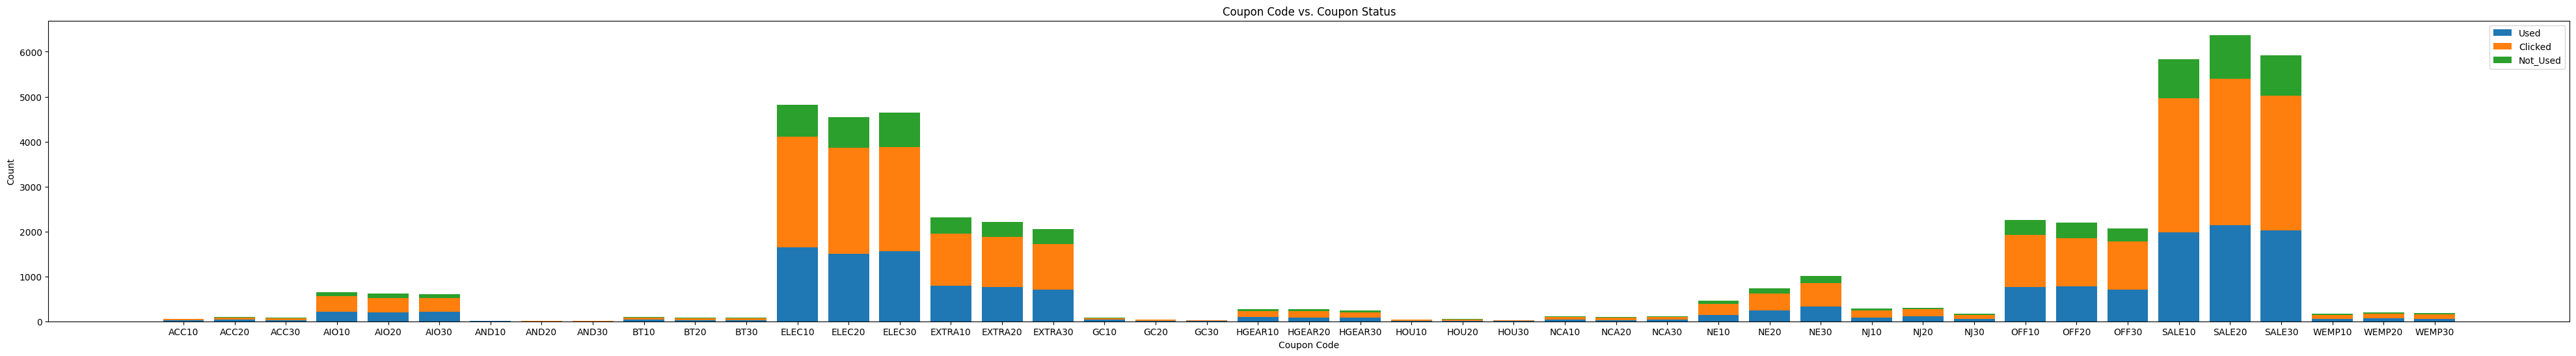

In [104]:
# plot coupon_code vs coupon_status
fig, ax = plt.subplots(figsize=(50, 6))
# Group data by coupon_code and coupon_status
grouped_data = dataset.groupby(['Coupon_Code', 'Coupon_Status']).size().unstack()

# Create bar chart
plt.bar(grouped_data.index, grouped_data['Used'], label='Used')
plt.bar(grouped_data.index, grouped_data['Clicked'], bottom=grouped_data['Used'], label='Clicked')
plt.bar(grouped_data.index, grouped_data['Not Used'], bottom=grouped_data['Used'] + grouped_data['Clicked'], label='Not_Used')

# Add labels and title
plt.xlabel('Coupon Code')
plt.ylabel('Count')
plt.title('Coupon Code vs. Coupon Status')

# Add legend and show plot
plt.legend()
plt.show()


We can see that Coupons like ['AID', 'ELEC', 'Extra', 'NE', 'OFF', 'Sale'] are catching the interest of many customers as they have high "Clicked" status.

In [105]:
# prompt: print all rows of customerID = 17850 and do groupby transaction date and print as a dataframe

df = dataset[dataset['CustomerID'] == 17850]
df = df.groupby('Transaction_Date').agg(
    count_of_transactions=('Transaction_ID', 'count'),
    total_amount_paid=('amt_paid', 'sum'),
    average_price=('Avg_Price', 'mean'),
    delivery_charge=('Delivery_Charges', 'mean')
)
print(df.to_string())


                  count_of_transactions  total_amount_paid  average_price  delivery_charge
Transaction_Date                                                                          
2019-01-01                           45           4780.827      79.002889         6.995111
2019-01-03                           20           1853.360      52.917500        36.194000
2019-01-04                           19           1805.403      34.323684         7.649474
2019-01-16                            8            844.040      59.466250         6.500000
2019-01-17                           55           5680.338      63.847818        10.135818
2019-01-18                           36           6531.704      75.641111        10.908056
2019-01-21                            2            440.620     102.135000         6.500000
2019-01-22                           36           5330.246     119.296667         6.561111
2019-01-24                           42           5254.290      69.144524        10.696190

Checking sales of each Product_category

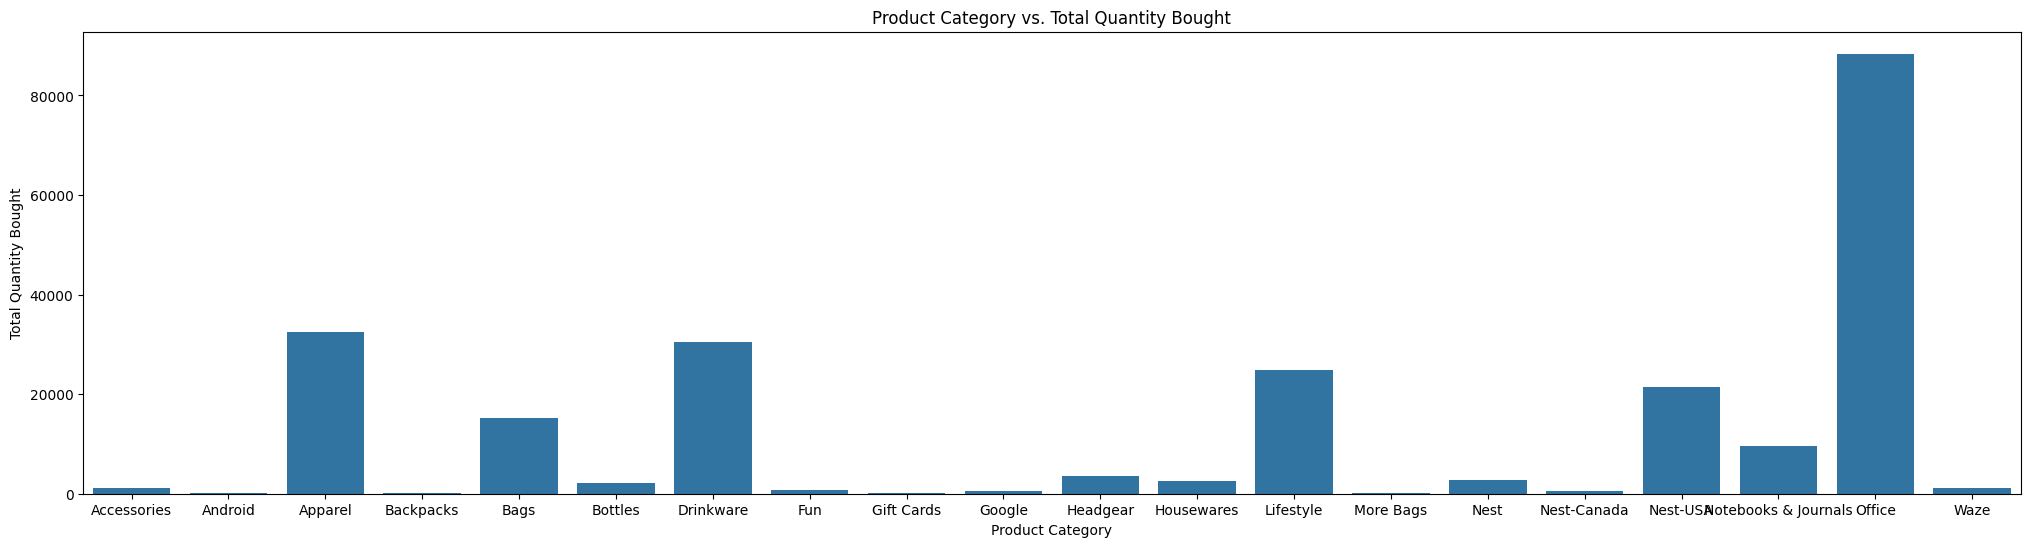

In [106]:
# prompt: plot product_category vs total quantity bought

product_category_quantity = dataset.groupby('Product_Category')['Quantity'].sum()

plt.figure(figsize=(25, 6))
sns.barplot(x=product_category_quantity.index, y=product_category_quantity.values)
plt.xlabel('Product Category')
plt.ylabel('Total Quantity Bought')
plt.title('Product Category vs. Total Quantity Bought')
plt.show()


<H1>Observations:</H1>
<li>Office Products are in high demand.</li>
<li> Products like Backpacks, android, gift cards, more bags have no almost no sales.</li>
<li> Accessories, Bottles, Fun, Google,Housewares,Nest, Waze have very less sales</li>

In [107]:
dataset[(dataset['CustomerID']==17850) & (dataset['Transaction_Date']=='2019-01-01')]

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,GST,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct,Coupon_Number,amt_paid
0,17850.0,M,Chicago,12.0,16679.0,2019-01-01,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.50,Used,0.10,4500.0,2424.5,1,ELEC10,10.0,10.0,138.339
1,17850.0,M,Chicago,12.0,16680.0,2019-01-01,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.50,Used,0.10,4500.0,2424.5,1,ELEC10,10.0,10.0,138.339
2,17850.0,M,Chicago,12.0,16696.0,2019-01-01,Nest Cam Outdoor Security Camera - USA,Nest-USA,2.0,122.77,6.50,Not Used,0.10,4500.0,2424.5,1,ELEC10,10.0,10.0,245.540
3,17850.0,M,Chicago,12.0,16699.0,2019-01-01,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1.0,81.50,6.50,Clicked,0.10,4500.0,2424.5,1,ELEC10,10.0,10.0,81.500
4,17850.0,M,Chicago,12.0,16700.0,2019-01-01,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.50,Clicked,0.10,4500.0,2424.5,1,ELEC10,10.0,10.0,153.710
5,17850.0,M,Chicago,12.0,16701.0,2019-01-01,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.50,Clicked,0.10,4500.0,2424.5,1,ELEC10,10.0,10.0,153.710
6,17850.0,M,Chicago,12.0,16702.0,2019-01-01,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,2.0,153.71,6.50,Clicked,0.10,4500.0,2424.5,1,ELEC10,10.0,10.0,307.420
7,17850.0,M,Chicago,12.0,16703.0,2019-01-01,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,2.0,81.50,6.50,Not Used,0.10,4500.0,2424.5,1,ELEC10,10.0,10.0,163.000
8,17850.0,M,Chicago,12.0,16704.0,2019-01-01,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,256.88,6.50,Used,0.10,4500.0,2424.5,1,ELEC10,10.0,10.0,231.192
9,17850.0,M,Chicago,12.0,16710.0,2019-01-01,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,28.78,Clicked,0.10,4500.0,2424.5,1,ELEC10,10.0,10.0,153.710


Separating Discount_pct from Coupon_Code

In [108]:
# create a column in dataset names Coupon_Name having value as the Coupon Code - Coupon Number

dataset['Coupon_Name'] = dataset['Coupon_Code'].astype(str).str[:-2]
dataset

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_Description,Product_Category,Quantity,Avg_Price,...,Coupon_Status,GST,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct,Coupon_Number,amt_paid,Coupon_Name
0,17850.0,M,Chicago,12.0,16679.0,2019-01-01,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,...,Used,0.10,4500.0,2424.50,1,ELEC10,10.0,10.0,138.339,ELEC
1,17850.0,M,Chicago,12.0,16680.0,2019-01-01,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,...,Used,0.10,4500.0,2424.50,1,ELEC10,10.0,10.0,138.339,ELEC
2,17850.0,M,Chicago,12.0,16696.0,2019-01-01,Nest Cam Outdoor Security Camera - USA,Nest-USA,2.0,122.77,...,Not Used,0.10,4500.0,2424.50,1,ELEC10,10.0,10.0,245.540,ELEC
3,17850.0,M,Chicago,12.0,16699.0,2019-01-01,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1.0,81.50,...,Clicked,0.10,4500.0,2424.50,1,ELEC10,10.0,10.0,81.500,ELEC
4,17850.0,M,Chicago,12.0,16700.0,2019-01-01,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,...,Clicked,0.10,4500.0,2424.50,1,ELEC10,10.0,10.0,153.710,ELEC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,13155.0,F,California,8.0,22504.0,2019-03-10,Gift Card - $250.00,Gift Cards,1.0,250.00,...,Clicked,0.05,2500.0,1294.22,3,GC30,30.0,30.0,250.000,GC
52920,18077.0,M,Chicago,34.0,24250.0,2019-03-28,Gift Card - $25.00,Gift Cards,1.0,25.00,...,Used,0.05,2000.0,1066.12,3,GC30,30.0,30.0,17.500,GC
52921,16085.0,M,California,15.0,39991.0,2019-10-06,Google Leather Perforated Journal,Notebooks & Journals,1.0,10.80,...,Clicked,0.05,3000.0,2230.76,10,NJ10,10.0,10.0,10.800,NJ
52922,16085.0,M,California,15.0,39991.0,2019-10-06,Google Spiral Leather Journal,Notebooks & Journals,1.0,9.60,...,Used,0.05,3000.0,2230.76,10,NJ10,10.0,10.0,8.640,NJ


In [109]:
dataset.drop(columns=['Coupon_Code'],inplace=True)

In [110]:
dataset.drop(columns=['Month'],inplace=True)
dataset

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,GST,Offline_Spend,Online_Spend,Discount_pct,Coupon_Number,amt_paid,Coupon_Name
0,17850.0,M,Chicago,12.0,16679.0,2019-01-01,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Used,0.10,4500.0,2424.50,10.0,10.0,138.339,ELEC
1,17850.0,M,Chicago,12.0,16680.0,2019-01-01,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Used,0.10,4500.0,2424.50,10.0,10.0,138.339,ELEC
2,17850.0,M,Chicago,12.0,16696.0,2019-01-01,Nest Cam Outdoor Security Camera - USA,Nest-USA,2.0,122.77,6.5,Not Used,0.10,4500.0,2424.50,10.0,10.0,245.540,ELEC
3,17850.0,M,Chicago,12.0,16699.0,2019-01-01,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1.0,81.50,6.5,Clicked,0.10,4500.0,2424.50,10.0,10.0,81.500,ELEC
4,17850.0,M,Chicago,12.0,16700.0,2019-01-01,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Clicked,0.10,4500.0,2424.50,10.0,10.0,153.710,ELEC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,13155.0,F,California,8.0,22504.0,2019-03-10,Gift Card - $250.00,Gift Cards,1.0,250.00,0.0,Clicked,0.05,2500.0,1294.22,30.0,30.0,250.000,GC
52920,18077.0,M,Chicago,34.0,24250.0,2019-03-28,Gift Card - $25.00,Gift Cards,1.0,25.00,0.0,Used,0.05,2000.0,1066.12,30.0,30.0,17.500,GC
52921,16085.0,M,California,15.0,39991.0,2019-10-06,Google Leather Perforated Journal,Notebooks & Journals,1.0,10.80,6.0,Clicked,0.05,3000.0,2230.76,10.0,10.0,10.800,NJ
52922,16085.0,M,California,15.0,39991.0,2019-10-06,Google Spiral Leather Journal,Notebooks & Journals,1.0,9.60,6.0,Used,0.05,3000.0,2230.76,10.0,10.0,8.640,NJ


In [111]:
dataset.drop(columns=['Coupon_Number'],inplace=True)
dataset

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,GST,Offline_Spend,Online_Spend,Discount_pct,amt_paid,Coupon_Name
0,17850.0,M,Chicago,12.0,16679.0,2019-01-01,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Used,0.10,4500.0,2424.50,10.0,138.339,ELEC
1,17850.0,M,Chicago,12.0,16680.0,2019-01-01,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Used,0.10,4500.0,2424.50,10.0,138.339,ELEC
2,17850.0,M,Chicago,12.0,16696.0,2019-01-01,Nest Cam Outdoor Security Camera - USA,Nest-USA,2.0,122.77,6.5,Not Used,0.10,4500.0,2424.50,10.0,245.540,ELEC
3,17850.0,M,Chicago,12.0,16699.0,2019-01-01,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1.0,81.50,6.5,Clicked,0.10,4500.0,2424.50,10.0,81.500,ELEC
4,17850.0,M,Chicago,12.0,16700.0,2019-01-01,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Clicked,0.10,4500.0,2424.50,10.0,153.710,ELEC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,13155.0,F,California,8.0,22504.0,2019-03-10,Gift Card - $250.00,Gift Cards,1.0,250.00,0.0,Clicked,0.05,2500.0,1294.22,30.0,250.000,GC
52920,18077.0,M,Chicago,34.0,24250.0,2019-03-28,Gift Card - $25.00,Gift Cards,1.0,25.00,0.0,Used,0.05,2000.0,1066.12,30.0,17.500,GC
52921,16085.0,M,California,15.0,39991.0,2019-10-06,Google Leather Perforated Journal,Notebooks & Journals,1.0,10.80,6.0,Clicked,0.05,3000.0,2230.76,10.0,10.800,NJ
52922,16085.0,M,California,15.0,39991.0,2019-10-06,Google Spiral Leather Journal,Notebooks & Journals,1.0,9.60,6.0,Used,0.05,3000.0,2230.76,10.0,8.640,NJ


Filling the null values in Discount_pct and Coupon_Name with mode value as they are very few in number

In [112]:
# fill the null values in discount_pct and coupon_name with mod value

dataset['Discount_pct'].fillna(dataset['Discount_pct'].mode()[0], inplace=True)
dataset['Coupon_Name'].fillna(dataset['Coupon_Name'].mode()[0], inplace=True)

dataset


,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,GST,Offline_Spend,Online_Spend,Discount_pct,amt_paid,Coupon_Name
0,17850.0,M,Chicago,12.0,16679.0,2019-01-01,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Used,0.10,4500.0,2424.50,10.0,138.339,ELEC
1,17850.0,M,Chicago,12.0,16680.0,2019-01-01,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Used,0.10,4500.0,2424.50,10.0,138.339,ELEC
2,17850.0,M,Chicago,12.0,16696.0,2019-01-01,Nest Cam Outdoor Security Camera - USA,Nest-USA,2.0,122.77,6.5,Not Used,0.10,4500.0,2424.50,10.0,245.540,ELEC
3,17850.0,M,Chicago,12.0,16699.0,2019-01-01,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1.0,81.50,6.5,Clicked,0.10,4500.0,2424.50,10.0,81.500,ELEC
4,17850.0,M,Chicago,12.0,16700.0,2019-01-01,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Clicked,0.10,4500.0,2424.50,10.0,153.710,ELEC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,13155.0,F,California,8.0,22504.0,2019-03-10,Gift Card - $250.00,Gift Cards,1.0,250.00,0.0,Clicked,0.05,2500.0,1294.22,30.0,250.000,GC
52920,18077.0,M,Chicago,34.0,24250.0,2019-03-28,Gift Card - $25.00,Gift Cards,1.0,25.00,0.0,Used,0.05,2000.0,1066.12,30.0,17.500,GC
52921,16085.0,M,California,15.0,39991.0,2019-10-06,Google Leather Perforated Journal,Notebooks & Journals,1.0,10.80,6.0,Clicked,0.05,3000.0,2230.76,10.0,10.800,NJ
52922,16085.0,M,California,15.0,39991.0,2019-10-06,Google Spiral Leather Journal,Notebooks & Journals,1.0,9.60,6.0,Used,0.05,3000.0,2230.76,10.0,8.640,NJ


In [113]:
dataset.drop(columns=['amt_paid'],inplace=True)
def calculate_amt_paid(row):
  if row['Coupon_Status'] == 'Used':
    return row['Quantity'] * row['Avg_Price'] - (row['Discount_pct']*row['Avg_Price']/100)
  else:
    return row['Quantity'] * row['Avg_Price']

dataset['amt_paid'] = dataset.apply(calculate_amt_paid, axis=1)
dataset

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,GST,Offline_Spend,Online_Spend,Discount_pct,Coupon_Name,amt_paid
0,17850.0,M,Chicago,12.0,16679.0,2019-01-01,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Used,0.10,4500.0,2424.50,10.0,ELEC,138.339
1,17850.0,M,Chicago,12.0,16680.0,2019-01-01,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Used,0.10,4500.0,2424.50,10.0,ELEC,138.339
2,17850.0,M,Chicago,12.0,16696.0,2019-01-01,Nest Cam Outdoor Security Camera - USA,Nest-USA,2.0,122.77,6.5,Not Used,0.10,4500.0,2424.50,10.0,ELEC,245.540
3,17850.0,M,Chicago,12.0,16699.0,2019-01-01,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1.0,81.50,6.5,Clicked,0.10,4500.0,2424.50,10.0,ELEC,81.500
4,17850.0,M,Chicago,12.0,16700.0,2019-01-01,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Clicked,0.10,4500.0,2424.50,10.0,ELEC,153.710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,13155.0,F,California,8.0,22504.0,2019-03-10,Gift Card - $250.00,Gift Cards,1.0,250.00,0.0,Clicked,0.05,2500.0,1294.22,30.0,GC,250.000
52920,18077.0,M,Chicago,34.0,24250.0,2019-03-28,Gift Card - $25.00,Gift Cards,1.0,25.00,0.0,Used,0.05,2000.0,1066.12,30.0,GC,17.500
52921,16085.0,M,California,15.0,39991.0,2019-10-06,Google Leather Perforated Journal,Notebooks & Journals,1.0,10.80,6.0,Clicked,0.05,3000.0,2230.76,10.0,NJ,10.800
52922,16085.0,M,California,15.0,39991.0,2019-10-06,Google Spiral Leather Journal,Notebooks & Journals,1.0,9.60,6.0,Used,0.05,3000.0,2230.76,10.0,NJ,8.640


I observed that Not used and clicked status have discount_pct used. So removing them.

In [114]:
# Replace Coupon_Name with 'None' where Coupon_Status is 'Not Used' or 'Clicked'
dataset['Coupon_Name'] = dataset.apply(lambda row: 'None' if row['Coupon_Status'] in ['Not Used', 'Clicked'] else row['Coupon_Name'], axis=1)

# Replace Discount_pct with 0 where Coupon_Status is 'Not Used' or 'Clicked'
dataset['Discount_pct'] = dataset.apply(lambda row: 0 if row['Coupon_Status'] in ['Not Used', 'Clicked'] else row['Discount_pct'], axis=1)

dataset

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,GST,Offline_Spend,Online_Spend,Discount_pct,Coupon_Name,amt_paid
0,17850.0,M,Chicago,12.0,16679.0,2019-01-01,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Used,0.10,4500.0,2424.50,10.0,ELEC,138.339
1,17850.0,M,Chicago,12.0,16680.0,2019-01-01,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Used,0.10,4500.0,2424.50,10.0,ELEC,138.339
2,17850.0,M,Chicago,12.0,16696.0,2019-01-01,Nest Cam Outdoor Security Camera - USA,Nest-USA,2.0,122.77,6.5,Not Used,0.10,4500.0,2424.50,0.0,None,245.540
3,17850.0,M,Chicago,12.0,16699.0,2019-01-01,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1.0,81.50,6.5,Clicked,0.10,4500.0,2424.50,0.0,None,81.500
4,17850.0,M,Chicago,12.0,16700.0,2019-01-01,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Clicked,0.10,4500.0,2424.50,0.0,None,153.710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,13155.0,F,California,8.0,22504.0,2019-03-10,Gift Card - $250.00,Gift Cards,1.0,250.00,0.0,Clicked,0.05,2500.0,1294.22,0.0,None,250.000
52920,18077.0,M,Chicago,34.0,24250.0,2019-03-28,Gift Card - $25.00,Gift Cards,1.0,25.00,0.0,Used,0.05,2000.0,1066.12,30.0,GC,17.500
52921,16085.0,M,California,15.0,39991.0,2019-10-06,Google Leather Perforated Journal,Notebooks & Journals,1.0,10.80,6.0,Clicked,0.05,3000.0,2230.76,0.0,None,10.800
52922,16085.0,M,California,15.0,39991.0,2019-10-06,Google Spiral Leather Journal,Notebooks & Journals,1.0,9.60,6.0,Used,0.05,3000.0,2230.76,10.0,NJ,8.640


Checking if the tenure month for all customer is updated one.

In [115]:
# prompt: check if only single tenure month exists for a customer

def check_single_tenure_month(data):
  """
  Checks if only a single tenure month exists for each customer in the dataset.

  Args:
    data: A Pandas DataFrame containing the customer data.

  Returns:
    True if only a single tenure month exists for each customer, False otherwise.
  """

  # Group the data by CustomerID and count the number of unique Tenure_Months
  grouped_data = data.groupby('CustomerID')['Tenure_Months'].nunique()

  # Check if any customer has more than one unique Tenure_Month
  for customer_id, tenure_months in grouped_data.items():
    if tenure_months > 1:
      return False

  # If we reach here, it means that every customer has only one unique Tenure_Month
  return True

# Call the function with the dataset
result = check_single_tenure_month(dataset)

# Print the result
print(f"Only a single tenure month exists for each customer: {result}")


Only a single tenure month exists for each customer: True


DATA PREPROCESSING

In [116]:
df = dataset.copy()
df.drop(columns=['Transaction_ID','Transaction_Date','Product_Description','Avg_Price','Coupon_Status','Coupon_Name'], inplace=True)
df

,CustomerID,Gender,Location,Tenure_Months,Product_Category,Quantity,Delivery_Charges,GST,Offline_Spend,Online_Spend,Discount_pct,amt_paid
0,17850.0,M,Chicago,12.0,Nest-USA,1.0,6.5,0.10,4500.0,2424.50,10.0,138.339
1,17850.0,M,Chicago,12.0,Nest-USA,1.0,6.5,0.10,4500.0,2424.50,10.0,138.339
2,17850.0,M,Chicago,12.0,Nest-USA,2.0,6.5,0.10,4500.0,2424.50,0.0,245.540
3,17850.0,M,Chicago,12.0,Nest-USA,1.0,6.5,0.10,4500.0,2424.50,0.0,81.500
4,17850.0,M,Chicago,12.0,Nest-USA,1.0,6.5,0.10,4500.0,2424.50,0.0,153.710
...,...,...,...,...,...,...,...,...,...,...,...,...
52919,13155.0,F,California,8.0,Gift Cards,1.0,0.0,0.05,2500.0,1294.22,0.0,250.000
52920,18077.0,M,Chicago,34.0,Gift Cards,1.0,0.0,0.05,2000.0,1066.12,30.0,17.500
52921,16085.0,M,California,15.0,Notebooks & Journals,1.0,6.0,0.05,3000.0,2230.76,0.0,10.800
52922,16085.0,M,California,15.0,Notebooks & Journals,1.0,6.0,0.05,3000.0,2230.76,10.0,8.640


In [117]:
# prompt: store unique values of Product_Categroy in a list

unique_product_categories = df['Product_Category'].unique().tolist()
unique_product_categories

['Nest-USA',
 'Office',
 'Apparel',
 'Bags',
 'Drinkware',
 'Lifestyle',
 'Waze',
 'Headgear',
 'Fun',
 'Notebooks & Journals',
 'Google',
 'Nest-Canada',
 'Bottles',
 'Gift Cards',
 'More Bags',
 'Backpacks',
 'Housewares',
 'Android',
 'Nest',
 'Accessories']

In [118]:
unique_locations = df['Location'].unique().tolist()

In [119]:
column = ['CustomerID','Gender','Tenure_Months', 'Avg_Delivery_cost','Avg_GST','Avg_offline_spend','Avg_online_spend','Avg_Discount_Pct','Total_Amt_Spent']

In [120]:
new_df = df.copy()
new_df

,CustomerID,Gender,Location,Tenure_Months,Product_Category,Quantity,Delivery_Charges,GST,Offline_Spend,Online_Spend,Discount_pct,amt_paid
0,17850.0,M,Chicago,12.0,Nest-USA,1.0,6.5,0.10,4500.0,2424.50,10.0,138.339
1,17850.0,M,Chicago,12.0,Nest-USA,1.0,6.5,0.10,4500.0,2424.50,10.0,138.339
2,17850.0,M,Chicago,12.0,Nest-USA,2.0,6.5,0.10,4500.0,2424.50,0.0,245.540
3,17850.0,M,Chicago,12.0,Nest-USA,1.0,6.5,0.10,4500.0,2424.50,0.0,81.500
4,17850.0,M,Chicago,12.0,Nest-USA,1.0,6.5,0.10,4500.0,2424.50,0.0,153.710
...,...,...,...,...,...,...,...,...,...,...,...,...
52919,13155.0,F,California,8.0,Gift Cards,1.0,0.0,0.05,2500.0,1294.22,0.0,250.000
52920,18077.0,M,Chicago,34.0,Gift Cards,1.0,0.0,0.05,2000.0,1066.12,30.0,17.500
52921,16085.0,M,California,15.0,Notebooks & Journals,1.0,6.0,0.05,3000.0,2230.76,0.0,10.800
52922,16085.0,M,California,15.0,Notebooks & Journals,1.0,6.0,0.05,3000.0,2230.76,10.0,8.640


In [121]:
new_df.drop(columns=['Gender','Location','Tenure_Months','Quantity'],inplace=True)
new_df.head()

,CustomerID,Product_Category,Delivery_Charges,GST,Offline_Spend,Online_Spend,Discount_pct,amt_paid
0,17850.0,Nest-USA,6.5,0.1,4500.0,2424.5,10.0,138.339
1,17850.0,Nest-USA,6.5,0.1,4500.0,2424.5,10.0,138.339
2,17850.0,Nest-USA,6.5,0.1,4500.0,2424.5,0.0,245.540
3,17850.0,Nest-USA,6.5,0.1,4500.0,2424.5,0.0,81.500
4,17850.0,Nest-USA,6.5,0.1,4500.0,2424.5,0.0,153.710


In [122]:
# add columns from list unique_product_category

for category in unique_product_categories:
  new_df[category] = 0
new_df

,CustomerID,Product_Category,Delivery_Charges,GST,Offline_Spend,Online_Spend,Discount_pct,amt_paid,Nest-USA,Office,...,Google,Nest-Canada,Bottles,Gift Cards,More Bags,Backpacks,Housewares,Android,Nest,Accessories
0,17850.0,Nest-USA,6.5,0.10,4500.0,2424.50,10.0,138.339,0,0,...,0,0,0,0,0,0,0,0,0,0
1,17850.0,Nest-USA,6.5,0.10,4500.0,2424.50,10.0,138.339,0,0,...,0,0,0,0,0,0,0,0,0,0
2,17850.0,Nest-USA,6.5,0.10,4500.0,2424.50,0.0,245.540,0,0,...,0,0,0,0,0,0,0,0,0,0
3,17850.0,Nest-USA,6.5,0.10,4500.0,2424.50,0.0,81.500,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17850.0,Nest-USA,6.5,0.10,4500.0,2424.50,0.0,153.710,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,13155.0,Gift Cards,0.0,0.05,2500.0,1294.22,0.0,250.000,0,0,...,0,0,0,0,0,0,0,0,0,0
52920,18077.0,Gift Cards,0.0,0.05,2000.0,1066.12,30.0,17.500,0,0,...,0,0,0,0,0,0,0,0,0,0
52921,16085.0,Notebooks & Journals,6.0,0.05,3000.0,2230.76,0.0,10.800,0,0,...,0,0,0,0,0,0,0,0,0,0
52922,16085.0,Notebooks & Journals,6.0,0.05,3000.0,2230.76,10.0,8.640,0,0,...,0,0,0,0,0,0,0,0,0,0


In [123]:
# add columns like avg_delivery_charges, avg_gst, avg_offline_spend, avg_online_spend, avg_discount_pct

# Create new columns
new_df['avg_delivery_charges'] = np.nan
new_df['avg_gst'] = np.nan
new_df['avg_offline_spend'] = np.nan
new_df['avg_online_spend'] = np.nan
new_df['avg_discount_pct'] = np.nan

# Calculate average values for each customer
for customer_id in new_df['CustomerID'].unique():
    customer_data = new_df[dataset['CustomerID'] == customer_id]
    new_df.loc[new_df['CustomerID'] == customer_id, 'avg_delivery_charges'] = customer_data['Delivery_Charges'].mean()
    new_df.loc[new_df['CustomerID'] == customer_id, 'avg_gst'] = customer_data['GST'].mean()
    new_df.loc[new_df['CustomerID'] == customer_id, 'avg_offline_spend'] = customer_data['Offline_Spend'].mean()
    new_df.loc[new_df['CustomerID'] == customer_id, 'avg_online_spend'] = customer_data['Online_Spend'].mean()
    new_df.loc[new_df['CustomerID'] == customer_id, 'avg_discount_pct'] = customer_data['Discount_pct'].mean()

new_df.head()


,CustomerID,Product_Category,Delivery_Charges,GST,Offline_Spend,Online_Spend,Discount_pct,amt_paid,Nest-USA,Office,...,Backpacks,Housewares,Android,Nest,Accessories,avg_delivery_charges,avg_gst,avg_offline_spend,avg_online_spend,avg_discount_pct
0,17850.0,Nest-USA,6.5,0.1,4500.0,2424.5,10.0,138.339,0,0,...,0,0,0,0,0,10.648552,0.131751,2670.03367,1315.788822,3.097643
1,17850.0,Nest-USA,6.5,0.1,4500.0,2424.5,10.0,138.339,0,0,...,0,0,0,0,0,10.648552,0.131751,2670.03367,1315.788822,3.097643
2,17850.0,Nest-USA,6.5,0.1,4500.0,2424.5,0.0,245.540,0,0,...,0,0,0,0,0,10.648552,0.131751,2670.03367,1315.788822,3.097643
3,17850.0,Nest-USA,6.5,0.1,4500.0,2424.5,0.0,81.500,0,0,...,0,0,0,0,0,10.648552,0.131751,2670.03367,1315.788822,3.097643
4,17850.0,Nest-USA,6.5,0.1,4500.0,2424.5,0.0,153.710,0,0,...,0,0,0,0,0,10.648552,0.131751,2670.03367,1315.788822,3.097643


In [124]:
new_df.drop(columns=['Delivery_Charges','GST','Offline_Spend','Online_Spend','Discount_pct'],inplace=True)
new_df

,CustomerID,Product_Category,amt_paid,Nest-USA,Office,Apparel,Bags,Drinkware,Lifestyle,Waze,...,Backpacks,Housewares,Android,Nest,Accessories,avg_delivery_charges,avg_gst,avg_offline_spend,avg_online_spend,avg_discount_pct
0,17850.0,Nest-USA,138.339,0,0,0,0,0,0,0,...,0,0,0,0,0,10.648552,0.131751,2670.033670,1315.788822,3.097643
1,17850.0,Nest-USA,138.339,0,0,0,0,0,0,0,...,0,0,0,0,0,10.648552,0.131751,2670.033670,1315.788822,3.097643
2,17850.0,Nest-USA,245.540,0,0,0,0,0,0,0,...,0,0,0,0,0,10.648552,0.131751,2670.033670,1315.788822,3.097643
3,17850.0,Nest-USA,81.500,0,0,0,0,0,0,0,...,0,0,0,0,0,10.648552,0.131751,2670.033670,1315.788822,3.097643
4,17850.0,Nest-USA,153.710,0,0,0,0,0,0,0,...,0,0,0,0,0,10.648552,0.131751,2670.033670,1315.788822,3.097643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,13155.0,Gift Cards,250.000,0,0,0,0,0,0,0,...,0,0,0,0,0,12.874286,0.130635,2500.000000,1433.993016,9.047619
52920,18077.0,Gift Cards,17.500,0,0,0,0,0,0,0,...,0,0,0,0,0,7.586508,0.137778,2079.365079,1297.091111,9.841270
52921,16085.0,Notebooks & Journals,10.800,0,0,0,0,0,0,0,...,0,0,0,0,0,10.576071,0.111429,3000.000000,2230.760000,4.642857
52922,16085.0,Notebooks & Journals,8.640,0,0,0,0,0,0,0,...,0,0,0,0,0,10.576071,0.111429,3000.000000,2230.760000,4.642857


In [125]:
# add amt_paid to column row[Product_category]

def add_amt_paid_to_category(row):
  """
  Adds the amt_paid to the corresponding Product_Category column.

  Args:
    row: A Pandas Series containing the data for a single row.

  Returns:
    A Pandas Series with the amt_paid added to the corresponding Product_Category column.
  """

  category = row['Product_Category']
  amt_paid = row['amt_paid']
  row[category] += amt_paid
  return row

# Apply the function to the DataFrame
new_df = new_df.apply(add_amt_paid_to_category, axis=1)

# Display the updated DataFrame
new_df.head()


,CustomerID,Product_Category,amt_paid,Nest-USA,Office,Apparel,Bags,Drinkware,Lifestyle,Waze,...,Backpacks,Housewares,Android,Nest,Accessories,avg_delivery_charges,avg_gst,avg_offline_spend,avg_online_spend,avg_discount_pct
0,17850.0,Nest-USA,138.339,138.339,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.648552,0.131751,2670.03367,1315.788822,3.097643
1,17850.0,Nest-USA,138.339,138.339,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.648552,0.131751,2670.03367,1315.788822,3.097643
2,17850.0,Nest-USA,245.540,245.540,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.648552,0.131751,2670.03367,1315.788822,3.097643
3,17850.0,Nest-USA,81.500,81.500,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.648552,0.131751,2670.03367,1315.788822,3.097643
4,17850.0,Nest-USA,153.710,153.710,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.648552,0.131751,2670.03367,1315.788822,3.097643


In [126]:
new_df.drop(columns=['amt_paid','Product_Category'],inplace=True)
new_df

,CustomerID,Nest-USA,Office,Apparel,Bags,Drinkware,Lifestyle,Waze,Headgear,Fun,...,Backpacks,Housewares,Android,Nest,Accessories,avg_delivery_charges,avg_gst,avg_offline_spend,avg_online_spend,avg_discount_pct
0,17850.0,138.339,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.648552,0.131751,2670.033670,1315.788822,3.097643
1,17850.0,138.339,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.648552,0.131751,2670.033670,1315.788822,3.097643
2,17850.0,245.540,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.648552,0.131751,2670.033670,1315.788822,3.097643
3,17850.0,81.500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.648552,0.131751,2670.033670,1315.788822,3.097643
4,17850.0,153.710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.648552,0.131751,2670.033670,1315.788822,3.097643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,13155.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,12.874286,0.130635,2500.000000,1433.993016,9.047619
52920,18077.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,7.586508,0.137778,2079.365079,1297.091111,9.841270
52921,16085.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.576071,0.111429,3000.000000,2230.760000,4.642857
52922,16085.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.576071,0.111429,3000.000000,2230.760000,4.642857


In [127]:
# groupby customerID with data added, except for 'avg_delivery_charges', 'avg_gst','avg_offline_spend', 'avg_online_spend', 'avg_discount_pct' columns where we will use mean

final_df = new_df.groupby('CustomerID').sum()
final_df['avg_delivery_charges'] = new_df.groupby('CustomerID')['avg_delivery_charges'].mean()
final_df['avg_gst'] = new_df.groupby('CustomerID')['avg_gst'].mean()
final_df['avg_offline_spend'] = new_df.groupby('CustomerID')['avg_offline_spend'].mean()
final_df['avg_online_spend'] = new_df.groupby('CustomerID')['avg_online_spend'].mean()
final_df['avg_discount_pct'] = new_df.groupby('CustomerID')['avg_discount_pct'].mean()

new_df.head()


,CustomerID,Nest-USA,Office,Apparel,Bags,Drinkware,Lifestyle,Waze,Headgear,Fun,...,Backpacks,Housewares,Android,Nest,Accessories,avg_delivery_charges,avg_gst,avg_offline_spend,avg_online_spend,avg_discount_pct
0,17850.0,138.339,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.648552,0.131751,2670.03367,1315.788822,3.097643
1,17850.0,138.339,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.648552,0.131751,2670.03367,1315.788822,3.097643
2,17850.0,245.540,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.648552,0.131751,2670.03367,1315.788822,3.097643
3,17850.0,81.500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.648552,0.131751,2670.03367,1315.788822,3.097643
4,17850.0,153.710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.648552,0.131751,2670.03367,1315.788822,3.097643


In [128]:
final_df.head()

,Nest-USA,Office,Apparel,Bags,Drinkware,Lifestyle,Waze,Headgear,Fun,Notebooks & Journals,...,Backpacks,Housewares,Android,Nest,Accessories,avg_delivery_charges,avg_gst,avg_offline_spend,avg_online_spend,avg_discount_pct
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0.000,9.350,13.993,0.000,0.000,0.000,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,75.000000,0.140000,3000.000000,2546.670000,30.000000
12347.0,3687.700,248.642,8879.926,27.940,31.930,9.570,0.0,37.98,0.0,0.0,...,0.0,0.0,0.0,502.4,2.99,11.085667,0.129500,2000.000000,2122.325667,8.000000
12348.0,475.000,220.473,49.740,243.991,410.504,27.293,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,8.571739,0.148696,3239.130435,2064.231739,11.739130
12350.0,768.166,0.000,157.327,0.000,0.000,0.000,0.0,27.71,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,7.522353,0.127059,4000.000000,3434.310000,10.588235
12356.0,610.300,44.119,252.156,3.493,47.370,13.160,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,278.6,0.00,17.708056,0.148333,3000.000000,2546.670000,9.166667


In [129]:
# create a column as CustomerID and append it in the front of new_df

final_df.insert(loc=0, column='CustomerID', value=final_df.index)
final_df

,CustomerID,Nest-USA,Office,Apparel,Bags,Drinkware,Lifestyle,Waze,Headgear,Fun,...,Backpacks,Housewares,Android,Nest,Accessories,avg_delivery_charges,avg_gst,avg_offline_spend,avg_online_spend,avg_discount_pct
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,12346.0,0.000,9.350,13.993,0.000,0.000,0.000,0.000,0.000,0.0,...,0.0,0.0,0.0,0.0,0.000,75.000000,0.140000,3000.000000,2546.670000,30.000000
12347.0,12347.0,3687.700,248.642,8879.926,27.940,31.930,9.570,0.000,37.980,0.0,...,0.0,0.0,0.0,502.4,2.990,11.085667,0.129500,2000.000000,2122.325667,8.000000
12348.0,12348.0,475.000,220.473,49.740,243.991,410.504,27.293,0.000,0.000,0.0,...,0.0,0.0,0.0,0.0,0.000,8.571739,0.148696,3239.130435,2064.231739,11.739130
12350.0,12350.0,768.166,0.000,157.327,0.000,0.000,0.000,0.000,27.710,0.0,...,0.0,0.0,0.0,0.0,0.000,7.522353,0.127059,4000.000000,3434.310000,10.588235
12356.0,12356.0,610.300,44.119,252.156,3.493,47.370,13.160,0.000,0.000,0.0,...,0.0,0.0,0.0,278.6,0.000,17.708056,0.148333,3000.000000,2546.670000,9.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18259.0,18259.0,0.000,0.000,153.303,0.000,10.390,0.000,0.000,0.000,0.0,...,0.0,0.0,0.0,0.0,0.000,39.761429,0.161429,2500.000000,2342.680000,4.285714
18260.0,18260.0,1154.900,200.892,320.082,162.371,67.243,0.000,21.570,55.810,46.8,...,0.0,0.0,0.0,0.0,24.462,15.810500,0.135250,3137.500000,2389.579250,9.250000
18269.0,18269.0,0.000,3.021,96.198,0.000,0.000,0.000,0.000,0.000,0.0,...,0.0,0.0,0.0,0.0,0.000,6.437500,0.170000,2625.000000,2177.293750,3.750000


In [130]:
# drop the index of new_df

final_df = final_df.reset_index(drop=True)
final_df

,CustomerID,Nest-USA,Office,Apparel,Bags,Drinkware,Lifestyle,Waze,Headgear,Fun,...,Backpacks,Housewares,Android,Nest,Accessories,avg_delivery_charges,avg_gst,avg_offline_spend,avg_online_spend,avg_discount_pct
0,12346.0,0.000,9.350,13.993,0.000,0.000,0.000,0.000,0.000,0.0,...,0.0,0.0,0.0,0.0,0.000,75.000000,0.140000,3000.000000,2546.670000,30.000000
1,12347.0,3687.700,248.642,8879.926,27.940,31.930,9.570,0.000,37.980,0.0,...,0.0,0.0,0.0,502.4,2.990,11.085667,0.129500,2000.000000,2122.325667,8.000000
2,12348.0,475.000,220.473,49.740,243.991,410.504,27.293,0.000,0.000,0.0,...,0.0,0.0,0.0,0.0,0.000,8.571739,0.148696,3239.130435,2064.231739,11.739130
3,12350.0,768.166,0.000,157.327,0.000,0.000,0.000,0.000,27.710,0.0,...,0.0,0.0,0.0,0.0,0.000,7.522353,0.127059,4000.000000,3434.310000,10.588235
4,12356.0,610.300,44.119,252.156,3.493,47.370,13.160,0.000,0.000,0.0,...,0.0,0.0,0.0,278.6,0.000,17.708056,0.148333,3000.000000,2546.670000,9.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,18259.0,0.000,0.000,153.303,0.000,10.390,0.000,0.000,0.000,0.0,...,0.0,0.0,0.0,0.0,0.000,39.761429,0.161429,2500.000000,2342.680000,4.285714
1464,18260.0,1154.900,200.892,320.082,162.371,67.243,0.000,21.570,55.810,46.8,...,0.0,0.0,0.0,0.0,24.462,15.810500,0.135250,3137.500000,2389.579250,9.250000
1465,18269.0,0.000,3.021,96.198,0.000,0.000,0.000,0.000,0.000,0.0,...,0.0,0.0,0.0,0.0,0.000,6.437500,0.170000,2625.000000,2177.293750,3.750000
1466,18277.0,298.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,...,0.0,0.0,0.0,0.0,0.000,6.000000,0.100000,3500.000000,1153.810000,0.000000


In [131]:
final_df[final_df['CustomerID']==17850]

,CustomerID,Nest-USA,Office,Apparel,Bags,Drinkware,Lifestyle,Waze,Headgear,Fun,...,Backpacks,Housewares,Android,Nest,Accessories,avg_delivery_charges,avg_gst,avg_offline_spend,avg_online_spend,avg_discount_pct
1358,17850.0,22464.582,3123.165,2320.003,2148.882,1394.646,625.942,50.638,367.77,50.066,...,82.52,30.9,0.0,0.0,0.0,10.648552,0.131751,2670.03367,1315.788822,3.097643


In [132]:
# create a new dataframe from dataset which contains unique CustomerID with their gender, location and tenure_months

unique_customer_df = dataset[['CustomerID', 'Gender', 'Location', 'Tenure_Months']].drop_duplicates()
unique_customer_df

,CustomerID,Gender,Location,Tenure_Months
0,17850.0,M,Chicago,12.0
23,13047.0,M,California,43.0
27,12583.0,M,Chicago,33.0
28,15100.0,M,California,49.0
29,14688.0,F,New York,46.0
...,...,...,...,...
50165,17644.0,F,Chicago,5.0
50462,16387.0,F,California,20.0
51683,15797.0,F,California,27.0
52310,16138.0,F,California,20.0


In [133]:
# create new columns = 'Gender', 'Location', 'Tenure_Months' in final_df and insert values from unique_customer_df

final_df = pd.merge(final_df, unique_customer_df, on='CustomerID', how='left')
final_df

,CustomerID,Nest-USA,Office,Apparel,Bags,Drinkware,Lifestyle,Waze,Headgear,Fun,...,Nest,Accessories,avg_delivery_charges,avg_gst,avg_offline_spend,avg_online_spend,avg_discount_pct,Gender,Location,Tenure_Months
0,12346.0,0.000,9.350,13.993,0.000,0.000,0.000,0.000,0.000,0.0,...,0.0,0.000,75.000000,0.140000,3000.000000,2546.670000,30.000000,F,New York,31.0
1,12347.0,3687.700,248.642,8879.926,27.940,31.930,9.570,0.000,37.980,0.0,...,502.4,2.990,11.085667,0.129500,2000.000000,2122.325667,8.000000,M,New York,20.0
2,12348.0,475.000,220.473,49.740,243.991,410.504,27.293,0.000,0.000,0.0,...,0.0,0.000,8.571739,0.148696,3239.130435,2064.231739,11.739130,M,California,39.0
3,12350.0,768.166,0.000,157.327,0.000,0.000,0.000,0.000,27.710,0.0,...,0.0,0.000,7.522353,0.127059,4000.000000,3434.310000,10.588235,M,California,25.0
4,12356.0,610.300,44.119,252.156,3.493,47.370,13.160,0.000,0.000,0.0,...,278.6,0.000,17.708056,0.148333,3000.000000,2546.670000,9.166667,F,Chicago,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,18259.0,0.000,0.000,153.303,0.000,10.390,0.000,0.000,0.000,0.0,...,0.0,0.000,39.761429,0.161429,2500.000000,2342.680000,4.285714,F,California,5.0
1464,18260.0,1154.900,200.892,320.082,162.371,67.243,0.000,21.570,55.810,46.8,...,0.0,24.462,15.810500,0.135250,3137.500000,2389.579250,9.250000,M,New York,43.0
1465,18269.0,0.000,3.021,96.198,0.000,0.000,0.000,0.000,0.000,0.0,...,0.0,0.000,6.437500,0.170000,2625.000000,2177.293750,3.750000,M,Chicago,25.0
1466,18277.0,298.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,...,0.0,0.000,6.000000,0.100000,3500.000000,1153.810000,0.000000,F,Chicago,47.0


In [134]:
# one hot encode the 'Location' column

final_df = pd.get_dummies(final_df, columns=['Location'])
final_df

,CustomerID,Nest-USA,Office,Apparel,Bags,Drinkware,Lifestyle,Waze,Headgear,Fun,...,avg_offline_spend,avg_online_spend,avg_discount_pct,Gender,Tenure_Months,Location_California,Location_Chicago,Location_New Jersey,Location_New York,Location_Washington DC
0,12346.0,0.000,9.350,13.993,0.000,0.000,0.000,0.000,0.000,0.0,...,3000.000000,2546.670000,30.000000,F,31.0,False,False,False,True,False
1,12347.0,3687.700,248.642,8879.926,27.940,31.930,9.570,0.000,37.980,0.0,...,2000.000000,2122.325667,8.000000,M,20.0,False,False,False,True,False
2,12348.0,475.000,220.473,49.740,243.991,410.504,27.293,0.000,0.000,0.0,...,3239.130435,2064.231739,11.739130,M,39.0,True,False,False,False,False
3,12350.0,768.166,0.000,157.327,0.000,0.000,0.000,0.000,27.710,0.0,...,4000.000000,3434.310000,10.588235,M,25.0,True,False,False,False,False
4,12356.0,610.300,44.119,252.156,3.493,47.370,13.160,0.000,0.000,0.0,...,3000.000000,2546.670000,9.166667,F,31.0,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,18259.0,0.000,0.000,153.303,0.000,10.390,0.000,0.000,0.000,0.0,...,2500.000000,2342.680000,4.285714,F,5.0,True,False,False,False,False
1464,18260.0,1154.900,200.892,320.082,162.371,67.243,0.000,21.570,55.810,46.8,...,3137.500000,2389.579250,9.250000,M,43.0,False,False,False,True,False
1465,18269.0,0.000,3.021,96.198,0.000,0.000,0.000,0.000,0.000,0.0,...,2625.000000,2177.293750,3.750000,M,25.0,False,True,False,False,False
1466,18277.0,298.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,...,3500.000000,1153.810000,0.000000,F,47.0,False,True,False,False,False


In [135]:
# Binary encoding Gender

final_df['Gender'].replace(['F', 'M'], [0, 1], inplace=True)
final_df

,CustomerID,Nest-USA,Office,Apparel,Bags,Drinkware,Lifestyle,Waze,Headgear,Fun,...,avg_offline_spend,avg_online_spend,avg_discount_pct,Gender,Tenure_Months,Location_California,Location_Chicago,Location_New Jersey,Location_New York,Location_Washington DC
0,12346.0,0.000,9.350,13.993,0.000,0.000,0.000,0.000,0.000,0.0,...,3000.000000,2546.670000,30.000000,0,31.0,False,False,False,True,False
1,12347.0,3687.700,248.642,8879.926,27.940,31.930,9.570,0.000,37.980,0.0,...,2000.000000,2122.325667,8.000000,1,20.0,False,False,False,True,False
2,12348.0,475.000,220.473,49.740,243.991,410.504,27.293,0.000,0.000,0.0,...,3239.130435,2064.231739,11.739130,1,39.0,True,False,False,False,False
3,12350.0,768.166,0.000,157.327,0.000,0.000,0.000,0.000,27.710,0.0,...,4000.000000,3434.310000,10.588235,1,25.0,True,False,False,False,False
4,12356.0,610.300,44.119,252.156,3.493,47.370,13.160,0.000,0.000,0.0,...,3000.000000,2546.670000,9.166667,0,31.0,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,18259.0,0.000,0.000,153.303,0.000,10.390,0.000,0.000,0.000,0.0,...,2500.000000,2342.680000,4.285714,0,5.0,True,False,False,False,False
1464,18260.0,1154.900,200.892,320.082,162.371,67.243,0.000,21.570,55.810,46.8,...,3137.500000,2389.579250,9.250000,1,43.0,False,False,False,True,False
1465,18269.0,0.000,3.021,96.198,0.000,0.000,0.000,0.000,0.000,0.0,...,2625.000000,2177.293750,3.750000,1,25.0,False,True,False,False,False
1466,18277.0,298.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,...,3500.000000,1153.810000,0.000000,0,47.0,False,True,False,False,False


In [136]:
final_df.drop(columns=['CustomerID'],inplace=True)
final_df

,Nest-USA,Office,Apparel,Bags,Drinkware,Lifestyle,Waze,Headgear,Fun,Notebooks & Journals,...,avg_offline_spend,avg_online_spend,avg_discount_pct,Gender,Tenure_Months,Location_California,Location_Chicago,Location_New Jersey,Location_New York,Location_Washington DC
0,0.000,9.350,13.993,0.000,0.000,0.000,0.000,0.000,0.0,0.000,...,3000.000000,2546.670000,30.000000,0,31.0,False,False,False,True,False
1,3687.700,248.642,8879.926,27.940,31.930,9.570,0.000,37.980,0.0,0.000,...,2000.000000,2122.325667,8.000000,1,20.0,False,False,False,True,False
2,475.000,220.473,49.740,243.991,410.504,27.293,0.000,0.000,0.0,0.000,...,3239.130435,2064.231739,11.739130,1,39.0,True,False,False,False,False
3,768.166,0.000,157.327,0.000,0.000,0.000,0.000,27.710,0.0,0.000,...,4000.000000,3434.310000,10.588235,1,25.0,True,False,False,False,False
4,610.300,44.119,252.156,3.493,47.370,13.160,0.000,0.000,0.0,0.000,...,3000.000000,2546.670000,9.166667,0,31.0,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,0.000,0.000,153.303,0.000,10.390,0.000,0.000,0.000,0.0,359.700,...,2500.000000,2342.680000,4.285714,0,5.0,True,False,False,False,False
1464,1154.900,200.892,320.082,162.371,67.243,0.000,21.570,55.810,46.8,164.042,...,3137.500000,2389.579250,9.250000,1,43.0,False,False,False,True,False
1465,0.000,3.021,96.198,0.000,0.000,0.000,0.000,0.000,0.0,0.000,...,2625.000000,2177.293750,3.750000,1,25.0,False,True,False,False,False
1466,298.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,...,3500.000000,1153.810000,0.000000,0,47.0,False,True,False,False,False


In [137]:
# create a new column Total_Amt_Paid with sum of values of columns in unique_product_categories

final_df['Total_Amt_Paid'] = final_df[unique_product_categories].sum(axis=1)
final_df.head()


,Nest-USA,Office,Apparel,Bags,Drinkware,Lifestyle,Waze,Headgear,Fun,Notebooks & Journals,...,avg_online_spend,avg_discount_pct,Gender,Tenure_Months,Location_California,Location_Chicago,Location_New Jersey,Location_New York,Location_Washington DC,Total_Amt_Paid
0,0.000,9.350,13.993,0.000,0.000,0.000,0.0,0.00,0.0,0.0,...,2546.670000,30.000000,0,31.0,False,False,False,True,False,23.343
1,3687.700,248.642,8879.926,27.940,31.930,9.570,0.0,37.98,0.0,0.0,...,2122.325667,8.000000,1,20.0,False,False,False,True,False,13451.458
2,475.000,220.473,49.740,243.991,410.504,27.293,0.0,0.00,0.0,0.0,...,2064.231739,11.739130,1,39.0,True,False,False,False,False,1427.001
3,768.166,0.000,157.327,0.000,0.000,0.000,0.0,27.71,0.0,0.0,...,3434.310000,10.588235,1,25.0,True,False,False,False,False,1211.399
4,610.300,44.119,252.156,3.493,47.370,13.160,0.0,0.00,0.0,0.0,...,2546.670000,9.166667,0,31.0,False,True,False,False,False,1249.198


In [138]:
final_df_columns = ['avg_delivery_charges', 'avg_gst', 'avg_offline_spend', 'avg_online_spend', 'avg_discount_pct', 'Total_Amt_Paid']


In [139]:
# join unique_product_categories to final_df_columns

final_df_columns.extend(unique_product_categories)
final_df_columns

['avg_delivery_charges',
 'avg_gst',
 'avg_offline_spend',
 'avg_online_spend',
 'avg_discount_pct',
 'Total_Amt_Paid',
 'Nest-USA',
 'Office',
 'Apparel',
 'Bags',
 'Drinkware',
 'Lifestyle',
 'Waze',
 'Headgear',
 'Fun',
 'Notebooks & Journals',
 'Google',
 'Nest-Canada',
 'Bottles',
 'Gift Cards',
 'More Bags',
 'Backpacks',
 'Housewares',
 'Android',
 'Nest',
 'Accessories']

PREPARING DATASET FOR CLUSTERING

In [140]:
# Step 1: Scale the data

scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(final_df[final_df_columns]), columns=final_df_columns)
scaled_df = pd.concat([final_df[['Gender', 'Tenure_Months']], scaled_df], axis=1)
scaled_df.head()


,Gender,Tenure_Months,avg_delivery_charges,avg_gst,avg_offline_spend,avg_online_spend,avg_discount_pct,Total_Amt_Paid,Nest-USA,Office,...,Google,Nest-Canada,Bottles,Gift Cards,More Bags,Backpacks,Housewares,Android,Nest,Accessories
0,0,31.0,4.595814,0.115238,0.186774,0.895799,5.374919,-0.618527,-0.681316,-0.357198,...,-0.124765,-0.300542,-0.204886,-0.104278,-0.062914,-0.158984,-0.103134,-0.163755,-0.425915,-0.083505
1,1,20.0,0.040679,-0.384479,-0.962347,0.296423,0.277471,2.122146,0.831515,0.122775,...,0.314764,-0.300542,-0.204886,-0.104278,-0.062914,-0.158984,-0.103134,-0.163755,0.219770,-0.032344
2,1,39.0,-0.138487,0.529083,0.461564,0.214367,1.143836,-0.332041,-0.486453,0.066273,...,-0.124765,-0.300542,-0.204886,-0.104278,-0.062914,-0.158984,-0.103134,-0.163755,-0.425915,-0.083505
3,1,25.0,-0.213276,-0.500660,1.335896,2.149569,0.877171,-0.376045,-0.366186,-0.375953,...,-0.124765,1.377366,-0.204886,-0.104278,-0.062914,-0.158984,-0.103134,-0.163755,-0.425915,-0.083505
4,0,31.0,0.512653,0.511839,0.186774,0.895799,0.547791,-0.368330,-0.430948,-0.287459,...,-0.124765,-0.300542,-0.204886,-0.104278,-0.062914,-0.158984,-0.103134,-0.163755,-0.067858,-0.083505


In [141]:
#Step2 : Perform PCA

pca = PCA()
pca_df = pca.fit_transform(scaled_df)

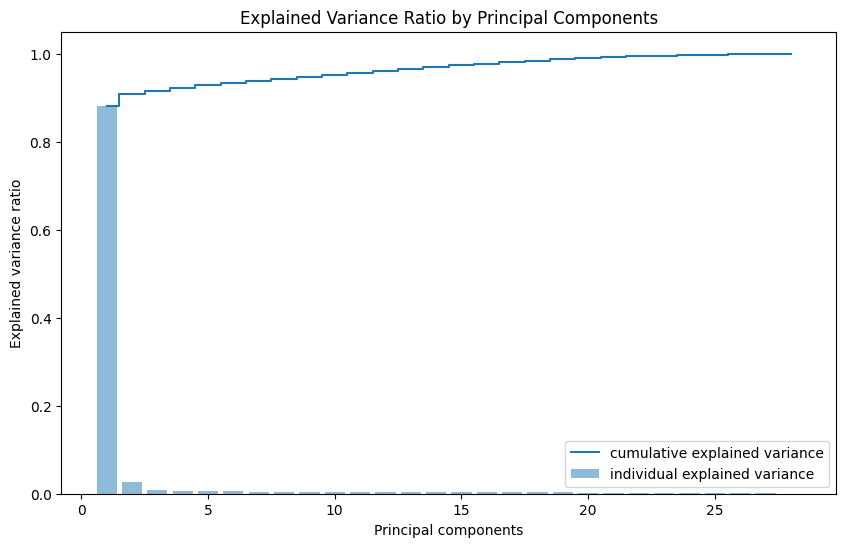

Number of components to capture 90.0% variance: 2


In [142]:
# Step 3: Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plotting explained variance ratio
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.title('Explained Variance Ratio by Principal Components')
plt.show()

# Determine number of components to capture 90-95% variance
desired_variance = 0.90
num_components = np.argmax(cumulative_explained_variance >= desired_variance) + 1
print(f'Number of components to capture {desired_variance*100}% variance: {num_components}')

The bar plot shows the explained variance ratio of each individual principal component, while the step plot shows the cumulative explained variance. This visualization helps you decide how many components to keep.

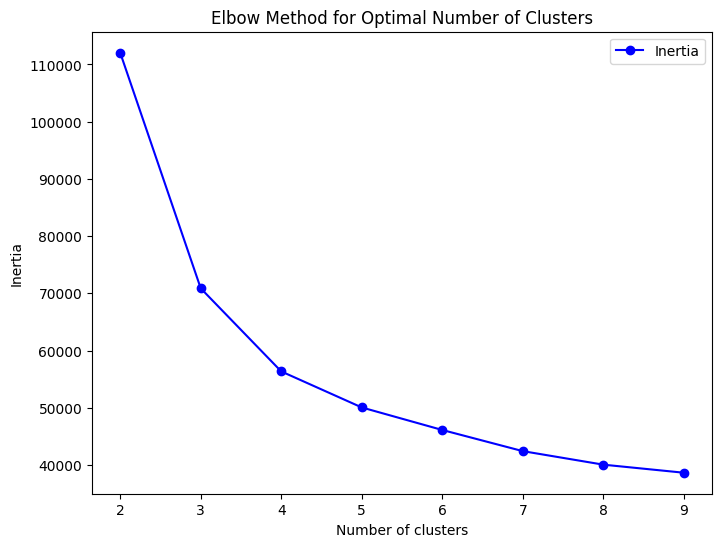

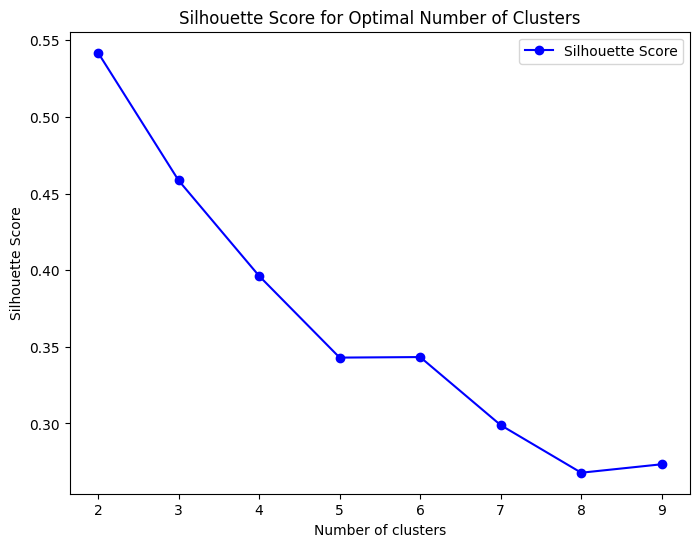

In [143]:
inertia = []
silhouette_scores = []
k_range = range(2, 10)  # Checking for 2 to 9 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_df)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(pca_df, kmeans.labels_))

# Plot the elbow method graph
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, 'bo-', label='Inertia')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.legend()
plt.show()

# Plot silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(k_range, silhouette_scores, 'bo-', label='Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal Number of Clusters')
plt.legend()
plt.show()


We can see from Elbow method that best number of clusters is 3.

In [144]:
# prompt: perform DBSCAN

# Define the DBSCAN model with desired parameters
dbscan_model = DBSCAN(eps=0.5, min_samples=10)

# Fit the model to the data
clusters = dbscan_model.fit_predict(pca_df)

# Add cluster labels to the DataFrame
final_df['Cluster'] = clusters

# Print the number of clusters
print(f"Number of clusters: {len(set(clusters))}")

# Print the cluster labels for each data point
print(f"Cluster labels: {clusters}")

# Analyze the clusters further based on your specific requirements


Number of clusters: 1
Cluster labels: [-1 -1 -1 ... -1 -1 -1]


In [145]:
# prompt: do clustering on scaled_df with 3 clusters

# Define the KMeans model with 3 clusters
kmeans_model = KMeans(n_clusters=3, random_state=42)

# Fit the model to the data
clusters = kmeans_model.fit_predict(scaled_df)

# Add cluster labels to the DataFrame
final_df['Cluster'] = clusters
final_df.head()

,Nest-USA,Office,Apparel,Bags,Drinkware,Lifestyle,Waze,Headgear,Fun,Notebooks & Journals,...,avg_discount_pct,Gender,Tenure_Months,Location_California,Location_Chicago,Location_New Jersey,Location_New York,Location_Washington DC,Total_Amt_Paid,Cluster
0,0.000,9.350,13.993,0.000,0.000,0.000,0.0,0.00,0.0,0.0,...,30.000000,0,31.0,False,False,False,True,False,23.343,2
1,3687.700,248.642,8879.926,27.940,31.930,9.570,0.0,37.98,0.0,0.0,...,8.000000,1,20.0,False,False,False,True,False,13451.458,2
2,475.000,220.473,49.740,243.991,410.504,27.293,0.0,0.00,0.0,0.0,...,11.739130,1,39.0,True,False,False,False,False,1427.001,0
3,768.166,0.000,157.327,0.000,0.000,0.000,0.0,27.71,0.0,0.0,...,10.588235,1,25.0,True,False,False,False,False,1211.399,2
4,610.300,44.119,252.156,3.493,47.370,13.160,0.0,0.00,0.0,0.0,...,9.166667,0,31.0,False,True,False,False,False,1249.198,2


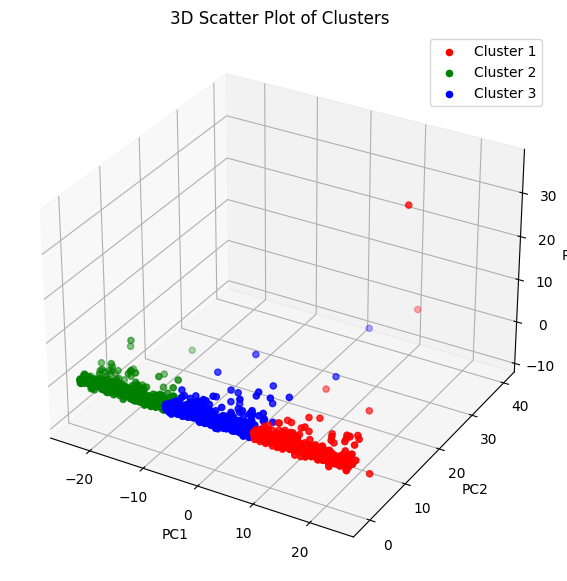

In [146]:

# Reduce dimensionality to 3 components
pca = PCA(n_components=3)
reduced_df = pd.DataFrame(pca.fit_transform(scaled_df), columns=['PC1', 'PC2', 'PC3'])

# Add cluster labels to the reduced DataFrame
reduced_df['Cluster'] = final_df['Cluster']

# Create a 3D scatter plot with different colors for each cluster
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(projection='3d')

colors = ['red', 'green', 'blue']
for i in range(3):
    cluster_data = reduced_df[reduced_df['Cluster'] == i]
    ax.scatter(cluster_data['PC1'], cluster_data['PC2'], cluster_data['PC3'], c=colors[i], label=f'Cluster {i+1}')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D Scatter Plot of Clusters')
plt.legend()
plt.show()
